# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:

1. Problem definition
2. Data
3. Features
4. Modelling
5. Experimentation

## Problem Definition 
> With clinical data, can we predict whether a patient has a heart diesease or not? 

## Data 
Data used in this notebook was obtained from Cleavland data from the UCI Machine Learning Repository. The data is open source and can be downloaded [here](https://archive.ics.uci.edu/ml/datasets/heart+Disease)

## Features

All the data features and attributes can be found [here](https://archive.ics.uci.edu/ml/datasets/heart+Disease). 
The features are listed below: 
1.  (age) - in years
2.  (sex) - 1 = male; 0 = female
3.  (cp)- chest pain type
4.  (trestbps) - resting blood pressure
5.  (chol) - serum cholestoral in mg/dl
6.  (fbs) - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7.  (restecg) - resting electrocardiographic results
8.  (thalach) - maximum heart rate achieved
9.  (exang) - exercise induced angina (1 = yes; 0 = no)
10. (oldpeak) - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. (slope) - the slope of the peak exercise ST segment
12. (ca) - number of major vessels (0-3) colored by flourosopy
13. (thal) - thalium stress result
14. (num/target)- the predicted attribute (1 = true; 0 = false)

## Tools to be used
- Pandas
- Numpy
- Matplotlib
- Seaborn
- Scikit-learn (sklearn)

### Data Dictionary

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
   - 0: Typical angina: chest pain related decrease blood supply to the heart
   - 1: Atypical angina: chest pain not related to heart
   - 2: Non-anginal pain: typically esophageal spasms (non heart related)
   - 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
 - serum = LDL + HDL + .2 * triglycerides
 - above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
 - '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
 - 0: Nothing to note
 - 1: ST-T Wave abnormality
  - can range from mild symptoms to severe problems
  - signals non-normal heart beat
 - 2: Possible or definite left ventricular hypertrophy
   -Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
 - 0: Upsloping: better heart rate with excercise (uncommon)
 - 1: Flatsloping: minimal change (typical healthy heart)
 - 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
 - colored vessel means the doctor can see the blood passing through
 - the more blood movement the better (no clots)
13. thal - thalium stress result
 - 1,3: normal
 - 6: fixed defect: used to be defect but ok now
 - 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

> Adapted from [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci) & [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/heart+Disease)

In [1]:
#importing all the required tools

#Exploratory Data Analysis (EDA) tools 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

#for plots to appear in the notebook 
%matplotlib inline  

#importing all the required models from scikit-learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#import all the model evaluation functions
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, plot_roc_curve


In [2]:
#Load dat by importing the csv 

df = pd.read_csv("C:\mlproject-1\Data\heart-disease.csv")
#df.head()
df.shape

(303, 14)

## Data Exploration (EDA)

In [3]:
#Let's find out the number of samples for each class 
df["target"].value_counts() #target is the column with the attribute to predict

1    165
0    138
Name: target, dtype: int64

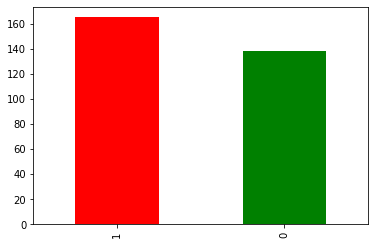

In [4]:
#Plotting the number of samples for each class
df["target"].value_counts().plot(kind='bar', color=['red', 'green']);

In [5]:
#Exploring the last 5 rows; df.head gives the first 5 rows
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
#Sum of missing values for every column
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
#more info on the dataframe; Statistics of every column
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


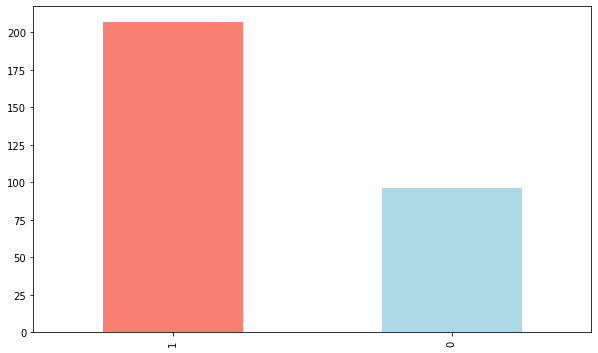

In [8]:
#Plotting the number of males & females in our samples
df.sex.value_counts().plot(kind='bar', figsize=(10,6), color=["salmon", "lightblue"]);

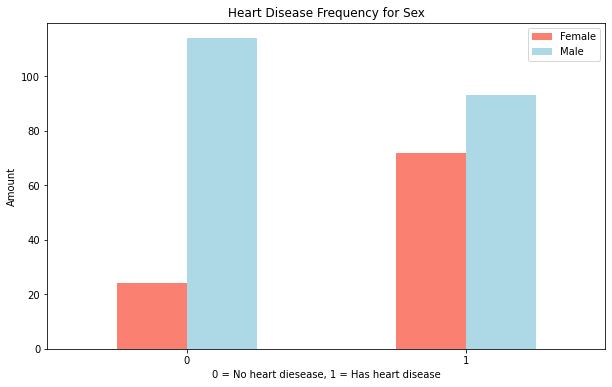

In [9]:
#comparing classes with each column; for example checking the number of heart disease cases with each sex
#Comparing target with sex coloumn

pd.crosstab(df.target, df.sex).plot(kind='bar', figsize=(10,6), color= ["salmon", "lightblue"]);
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No heart diesease, 1 = Has heart disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

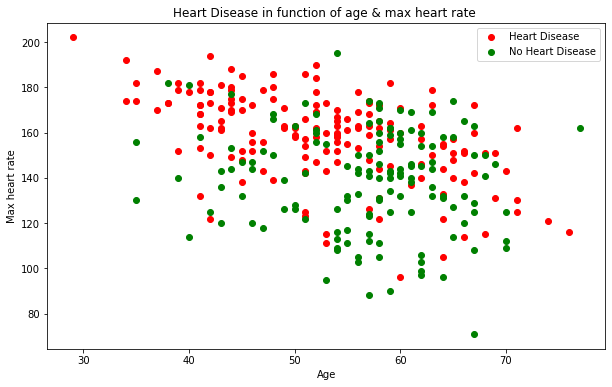

In [10]:
#Creating a new figure to compare max heart rate(thalach) vs age in both classes (with & without heart disease)
#scatter plot for class 1, i.e., people with heart disease 
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c='red');
#scatter plot for class 0, i.e., people without heart disease 
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c= 'green');
plt.title("Heart Disease in function of age & max heart rate ")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["Heart Disease", "No Heart Disease"]);

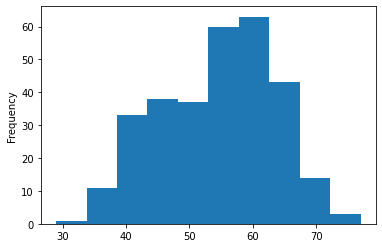

In [11]:
#Checking the distribution of the age column with a histogram
df.age.plot.hist();

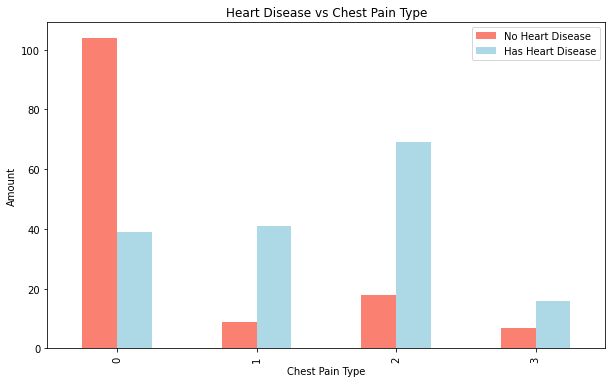

In [12]:
#Chest Pain type vs Heart Disease
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(10,6),color=['salmon', 'lightblue']);
plt.title("Heart Disease vs Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Heart Disease", "Has Heart Disease"]);

In [13]:
#Making a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


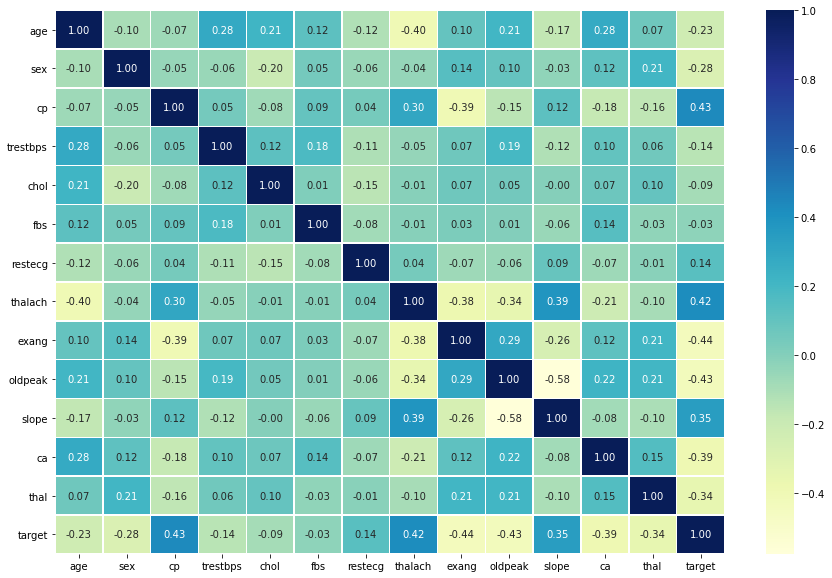

In [14]:
#Heat map for the correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax= sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu");

## Modelling 

Based on the prelimanary EDA, there seemed to be correlations (both +ve & -ve) between the features in the dataset.  

In [15]:
#Splitting the data into X (features) & Y(target)
X = df.drop("target", axis = 1)

Y = df["target"]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [16]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [17]:
#Splitting data into training & test sets
np.random.seed(24)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [18]:
len(X_train), len(Y_train)

(242, 242)

In [19]:
len(X_test), len(Y_test)

(61, 61)

Models to be tried: 
1. Logistic Regression 
2. K_neighbors Classifier
3. Random Forest Classifier

Creating a function to fit and score models instead of doing them one by one 

In [20]:
#Creating a dictionary of models 

models = {"Logistic Regression": LogisticRegression(), "KNN" : KNeighborsClassifier(), "Random Forest" : RandomForestClassifier()}

#Creating a function to fit & score models 

def fit_and_score(models, X_train, X_test, Y_Train, Y_test):
    """
    Fits and evaluates each model in the dictionary above. 
    models : dictionary of differnt models imported from Scikit-learn machine learning models
    X_train: training data (dropped traget)
    X_test: testing data (dropped target)
    Y_train: training labels 
    Y_test: testing labels
    """
    np.random.seed(24)
    #making a dictionary of model scores
    model_scores = {}
    #loop through each model from the dictionary "models"
    for name, model in models.items():
        #Fit the model to the data
        model.fit(X_train, Y_train)
        #Evaluate the model
        model_scores[name] = model.score(X_test, Y_test)
        
    return model_scores


In [21]:
model_scores = fit_and_score(models, X_train,X_test, Y_train, Y_test)
model_scores

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.6721311475409836,
 'Random Forest': 0.8688524590163934}

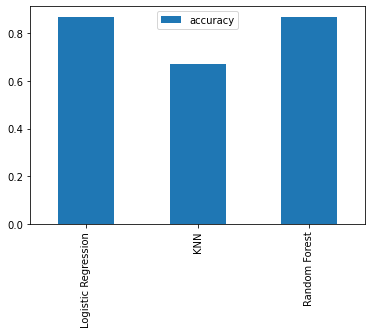

In [22]:
#Comparing the model_scores for each model by creating a dataframe
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [23]:
#Hyperparamter tuning KNN
train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, Y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, Y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, Y_test))

In [24]:
train_scores

[1.0,
 0.7892561983471075,
 0.7851239669421488,
 0.7520661157024794,
 0.7272727272727273,
 0.71900826446281,
 0.7024793388429752,
 0.7148760330578512,
 0.71900826446281,
 0.7107438016528925,
 0.7148760330578512,
 0.7148760330578512,
 0.6983471074380165,
 0.6859504132231405,
 0.6942148760330579,
 0.6735537190082644,
 0.7066115702479339,
 0.6983471074380165,
 0.7024793388429752,
 0.6776859504132231]

In [25]:
test_scores

[0.6721311475409836,
 0.5901639344262295,
 0.6557377049180327,
 0.6229508196721312,
 0.6721311475409836,
 0.639344262295082,
 0.639344262295082,
 0.6721311475409836,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.7213114754098361,
 0.6885245901639344,
 0.6721311475409836,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361]

Maximun KNN score on the test data is: 72.13%


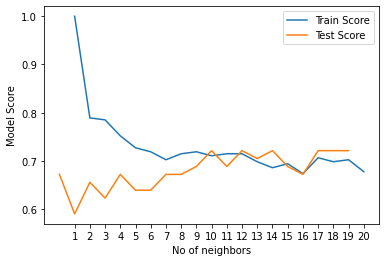

In [26]:
plt.plot(neighbors, train_scores, test_scores)
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("No of neighbors")
plt.ylabel("Model Score")
plt.legend(["Train Score", "Test Score"] );
print(f"Maximun KNN score on the test data is: {max(test_scores)*100:.2f}%")

In [27]:
#Hyperparameter tuning with RandomizedSearch CV for Logistic Regression & Random Forest Classifier 

#Creating a hyperparameter grid for Logistic Regression 
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

#Creating a hyperparameter grid for Random Forest Classifier

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [28]:
#Tuning Logistic Regression 
np.random.seed(24)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [29]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 4.281332398719396}

In [30]:
rs_log_reg.score(X_test, Y_test)

0.8688524590163934

In [31]:
#Tuning Randomforest Classifier 
np.random.seed(24)
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                               param_distributions= rf_grid, 
                               cv=5, 
                               n_iter = 20, 
                               verbose = True)

#Fit random hyperparameter search model for Random Forest 
rs_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [32]:
# Find the best hyperparameters
rs_rf.best_params_


{'n_estimators': 560,
 'min_samples_split': 2,
 'min_samples_leaf': 11,
 'max_depth': None}

In [33]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, Y_test)

0.8852459016393442

In [34]:
#Hyperparameter tuning with Grid Search CV

#Setting up hyperparameter grids 
#for Logistic Regression 

log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

#for Random Forest Classifier 

rf_grid =  {"n_estimators": np.arange(300, 700, 50),
           "max_depth": [None],
           "min_samples_split": np.arange(2, 20, 4),
           "min_samples_leaf": np.arange(1, 20, 4)}

In [35]:
#Setting up hyperprarameter grid search for Logistic Regression 
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid= log_reg_grid, cv= 5, verbose = True)
#Fit grid hyperparameter search model 
gs_log_reg.fit(X_train, Y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.9s finished


In [36]:
#Check for best hyperparameter
gs_log_reg.best_params_

{'C': 4.893900918477489, 'solver': 'liblinear'}

In [37]:
#Evaluate the grid search Logistic Regression model 
gs_log_reg.score(X_test, Y_test)

0.8688524590163934

In [48]:
#Setting up hyperparameter grid search for Random Forest 

#gs_rf = GridSearchCV(RandomForestClassifier(), param_grid = rf_grid, cv= 5, verbose = True)
#Fit grid hyperparameter search model 
#gs_rf.fit(X_train, Y_train);

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 10.5min finished


In [45]:
#Check for best hyperparameters
#gs_rf.best_params_ 

{'max_depth': None,
 'min_samples_leaf': 17,
 'min_samples_split': 6,
 'n_estimators': 650}

In [50]:
#Evaluate the grid search RF Model
#gs_rf.score(X_test, Y_test)

0.8852459016393442

## Evaluating the tuned model 

1. ROC & AUC curves 
2. Confusion Matrix 
3. Classification Report 
4. Precision  
5. Recall 
6. F1 Score 

In [38]:
# Make predictions with tuned model
Y_preds = gs_log_reg.predict(X_test)

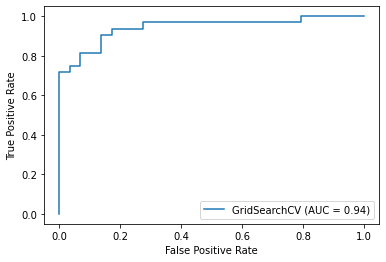

In [39]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, Y_test)

In [40]:
#Confusion Matrix 
print(confusion_matrix(Y_test, Y_preds))

[[23  6]
 [ 2 30]]


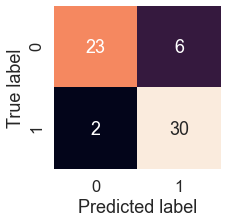

In [41]:

sns.set(font_scale=1.5)

def plot_conf_mat(Y_test, Y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(Y_test, Y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_mat(Y_test, Y_preds)

In [42]:
#Classification Report
print(classification_report(Y_test, Y_preds))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        29
           1       0.83      0.94      0.88        32

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [45]:
# Evaluation Metrics with Cross Validation 
# using cross_val_score()

#Checking best hyperparameters for Logistic Regression 
gs_log_reg.best_params_

{'C': 4.893900918477489, 'solver': 'liblinear'}

In [46]:
#Creating a new classifier with these (best) parameters
clf = LogisticRegression(C=4.893900918477489, solver = "liblinear")


In [53]:
#Cross validated Accuracy
cv_acc = cross_val_score(clf, X, Y, cv= 5, scoring = "accuracy")
cv_acc = np.mean(cv_acc)
cv_acc 

0.8215846994535518

In [54]:
#Cross Validated precision
cv_precision = cross_val_score(clf, X, Y, cv= 5, scoring = "precision")
cv_precision = np.mean(cv_precision)
cv_precision 

0.8179096985548598

In [55]:
#Cross Validated recall
cv_recall = cross_val_score(clf, X, Y, cv= 5, scoring = "recall")
cv_recall = np.mean(cv_recall)
cv_recall 

0.8727272727272727

In [56]:
#Cross Validated f1
cv_f1 = cross_val_score(clf, X, Y, cv= 5, scoring = "f1")
cv_f1 = np.mean(cv_f1)
cv_f1 

0.8429665874032072

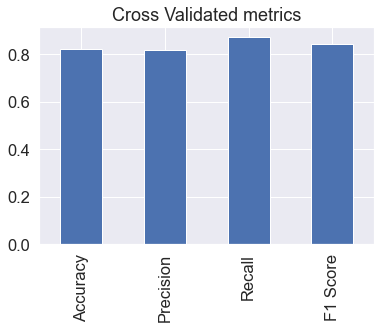

In [62]:
#Cross validated metrics

cv_metrics = pd.DataFrame({"Accuracy": cv_acc, "Precision": cv_precision, "Recall": cv_recall, "F1 Score": cv_f1}, index =[0])

#Plotting the metrics 
cv_metrics.T.plot.bar(title = "Cross Validated metrics", legend = False);

## Feature Importance 

"Which Features contributed the most to the predictions of the model?"

In [64]:
#Fitting the model with the best parameters
clf = LogisticRegression(C=4.893900918477489, solver = "liblinear")
clf.fit(X_train, Y_train);

In [65]:
#Checking coef_ for the LR model
clf.coef_

array([[ 8.41122924e-04, -1.75816929e+00,  7.97421731e-01,
        -1.22685199e-02, -4.10719751e-03,  2.68248973e-01,
         4.56873011e-01,  2.63676958e-02, -9.06671362e-01,
        -4.83991528e-01,  7.24548882e-01, -5.96106165e-01,
        -9.11917108e-01]])

In [67]:
#Matching coef values with columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0008411229237223903,
 'sex': -1.7581692940989786,
 'cp': 0.7974217309057009,
 'trestbps': -0.012268519944656454,
 'chol': -0.004107197505285396,
 'fbs': 0.26824897310942797,
 'restecg': 0.4568730110706226,
 'thalach': 0.026367695849725845,
 'exang': -0.9066713624617809,
 'oldpeak': -0.4839915283640918,
 'slope': 0.7245488824111561,
 'ca': -0.5961061648830075,
 'thal': -0.9119171079813796}

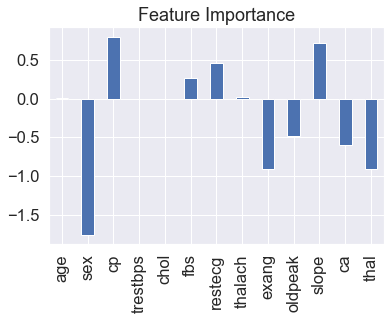

In [70]:
#Visualizing the same in a plot 
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title = "Feature Importance", legend = False);

In [72]:
import pickle

# Saving the model
pickle.dump(clf, open("logistic_regression_heartdisease_model.pkl", "wb"))
